# 🛡️ Washington Post Police Shootings Analysis

## 🎯 Project Objective

As a Security Data Analyst, the objective of this project is to analyze the Washington Post Police Shootings dataset to uncover patterns and insights related to police-involved shootings. The analysis will focus on factors such as the involvement of body cameras, signs of mental illness, the demographics of individuals involved, and how these incidents are distributed across different states and cities.

---


## 📥 Loading and Setting Up the Dataset

First, we'll load the dataset into a Pandas DataFrame and then set up an SQL connection to run queries on the data.


In [15]:
import pandas as pd

In [18]:
import sqlite3

In [20]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt

## Load the dataset

In [27]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\SQL\archive (10)\washington-post-police-shootings-export.csv")

## Convert DataFrame to SQL

In [33]:
conn = sqlite3.connect(':memory:')  # Create a connection to a database in memory

In [37]:
data.to_sql('shootings', conn, index=False, if_exists='replace')

9893

### Display the first few rows of the dataset

In [43]:
data.head()

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,02/01/2015,Lewis Lee Lembke,47,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,02/01/2015,Tim Elliot,53,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,03/01/2015,John Paul Quintero,...,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,04/01/2015,Kenneth Joe Brown,18,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,04/01/2015,Michael Rodriguez,39,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


### 🔍 Data Exploration and SQL Queries

## 1. 👮‍♂️ Distribution of Shootings by State
We'll begin by analyzing the distribution of police shootings across different states to identify areas with the highest and lowest incidents.

In [47]:
query = """
SELECT state, COUNT(*) as total_shootings 
FROM shootings 
GROUP BY state 
ORDER BY total_shootings DESC;
"""

##### Execute the query and load the result into a DataFrame

In [49]:
state_shootings = pd.read_sql_query(query, conn)

##### Display the first few rows of the joined DataFrame

In [51]:
state_shootings.head()

,state,total_shootings
0,CA,1357
1,TX,944
2,FL,635
3,AZ,440
4,GA,369


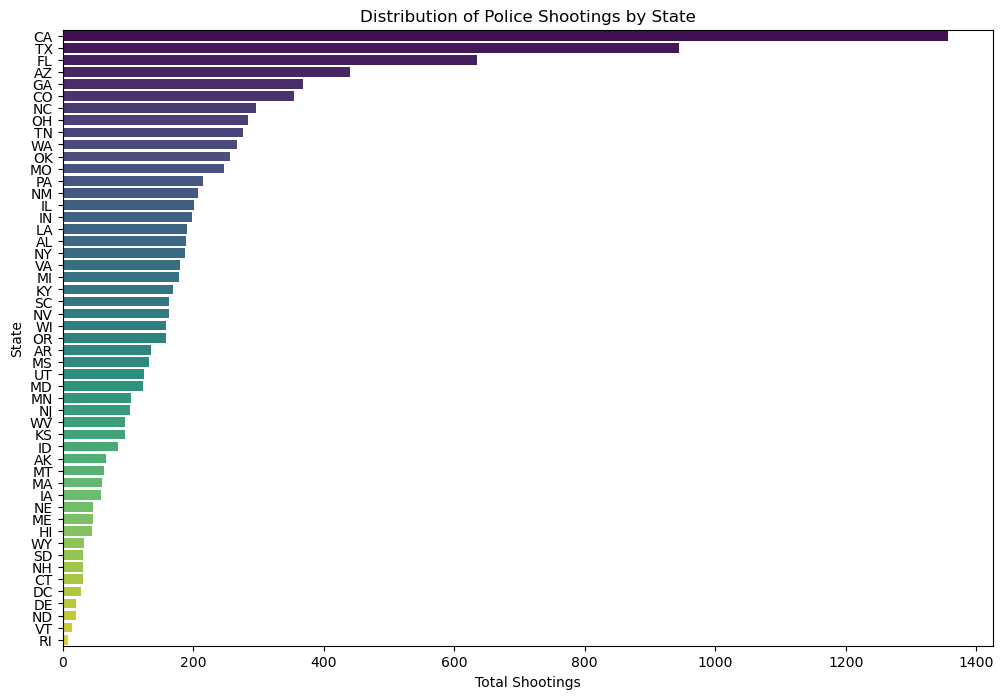

In [59]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_shootings', y='state', hue='state', data=state_shootings, palette='viridis')
plt.title('Distribution of Police Shootings by State')
plt.xlabel('Total Shootings')
plt.ylabel('State')
plt.show()

### Explanation:

The bar chart above shows the distribution of police shootings by state. States with the highest number of incidents should be further investigated to understand underlying causes, which could include factors such as policing practices, community relations, or demographic differences.

## 2. 📊 Age Distribution of Individuals Involved in Shootings
Next, we'll analyze the age distribution of individuals involved in these incidents.

In [240]:
query = """
SELECT age, COUNT(*) as total 
FROM shootings 
GROUP BY age 
ORDER BY age ASC;
"""

##### Execute the query and load the result into a DataFrame

In [242]:
age_distribution = pd.read_sql_query(query, conn)

##### Display the first few rows of the joined DataFrame

In [300]:
age_distribution.head()

,age,total
0,None,384
1,...,1
2,12,2
3,13,4
4,14,7


##### Filter out rows where age is None or non-numeric

In [250]:
cleaned_age_distribution = age_distribution.dropna(subset=['age'])

In [252]:
cleaned_age_distribution = cleaned_age_distribution[cleaned_age_distribution['age'].apply(lambda x: str(x).isdigit())]

##### Convert age to an integer for further processing

In [254]:
cleaned_age_distribution['age'] = cleaned_age_distribution['age'].astype(int)

##### Display the first few rows of the joined DataFrame

In [256]:
cleaned_age_distribution.head()

,age,total
2,12,2
3,13,4
4,14,7
5,15,26
6,16,46


In [258]:
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99] # Define age ranges

In [260]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

##### Create a new column for age ranges

In [262]:
cleaned_age_distribution['age_range'] = pd.cut(cleaned_age_distribution['age'], bins=bins, labels=labels, right=False)

##### Group by age range and count the occurrences, setting observed to False to retain current behavior

In [266]:
age_range_distribution = cleaned_age_distribution.groupby('age_range', observed=False)['total'].sum().reset_index()

##### Display the  DataFrame

In [268]:
age_range_distribution

,age_range,total
0,0-9,5
1,10-19,318
2,20-29,2287
3,30-39,3037
4,40-49,2013
5,50-59,1146
6,60-69,527
7,70-79,133
8,80-89,38
9,90-99,4


In [270]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

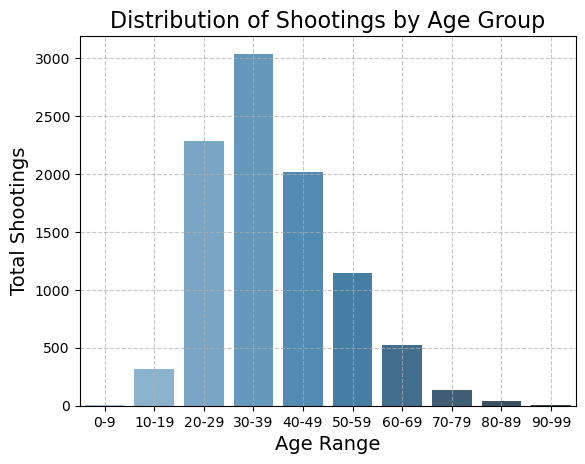

In [276]:
sns.barplot(x='age_range', y='total', hue= 'age_range', data=age_range_distribution, palette='Blues_d')
plt.title('Distribution of Shootings by Age Group', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Total Shootings', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##### Explanation
This visualization will show the number of shootings distributed across different age ranges, providing a clearer understanding of the data. If there are any outliers or unexpected values, they should be handled before grouping and visualizing the data.

## 3. 🎥 Body Camera Usage in Police Shootings
This analysis will examine how often body cameras were used during incidents and how their usage varies across states.

In [78]:
query = """
SELECT state, COUNT(*) as total_shootings, 
       SUM(CASE WHEN body_camera = 1 THEN 1 ELSE 0 END) as shootings_with_body_camera 
FROM shootings 
GROUP BY state 
ORDER BY shootings_with_body_camera DESC;
"""

##### Execute the query and load the result into a DataFrame

In [289]:
body_camera_usage = pd.read_sql_query(query, conn)

##### Display the first few rows of the joined DataFrame

In [82]:
body_camera_usage.head()

,state,total_shootings,shootings_with_body_camera
0,CA,1357,295
1,TX,944,152
2,FL,635,85
3,AZ,440,78
4,OH,284,61


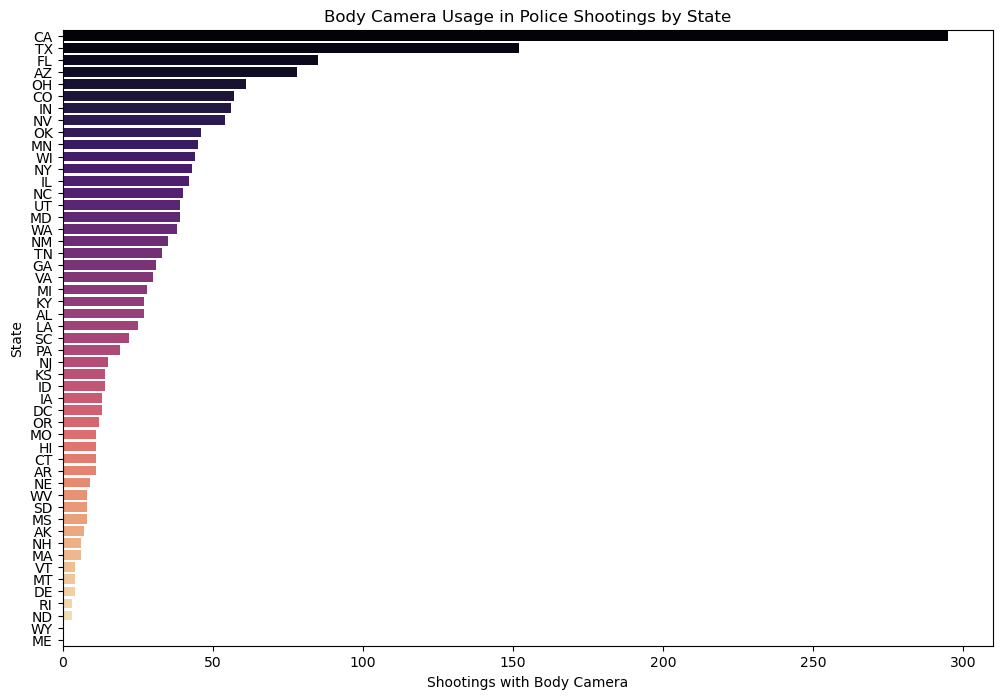

In [88]:
plt.figure(figsize=(12, 8))
sns.barplot(x='shootings_with_body_camera', y='state', hue='state', data=body_camera_usage, palette='magma')
plt.title('Body Camera Usage in Police Shootings by State')
plt.xlabel('Shootings with Body Camera')
plt.ylabel('State')
plt.show()

### Explanation:

The chart highlights the usage of body cameras in police shootings across various states. States with low body camera usage may need to adopt policies that encourage or mandate their use, as they provide critical evidence and accountability in police operations.

## 4. 🤯 Incidents Involving Signs of Mental Illness
We'll analyze the number of incidents where signs of mental illness were reported and how these incidents correlate with other factors.

In [93]:
query = """
SELECT signs_of_mental_illness, COUNT(*) as total_shootings 
FROM shootings 
GROUP BY signs_of_mental_illness;
"""

##### Execute the query and load the result into a DataFrame

In [95]:
mental_illness_shootings = pd.read_sql_query(query, conn)

##### Display the DataFrame

In [97]:
mental_illness_shootings

,signs_of_mental_illness,total_shootings
0,0,7941
1,1,1952


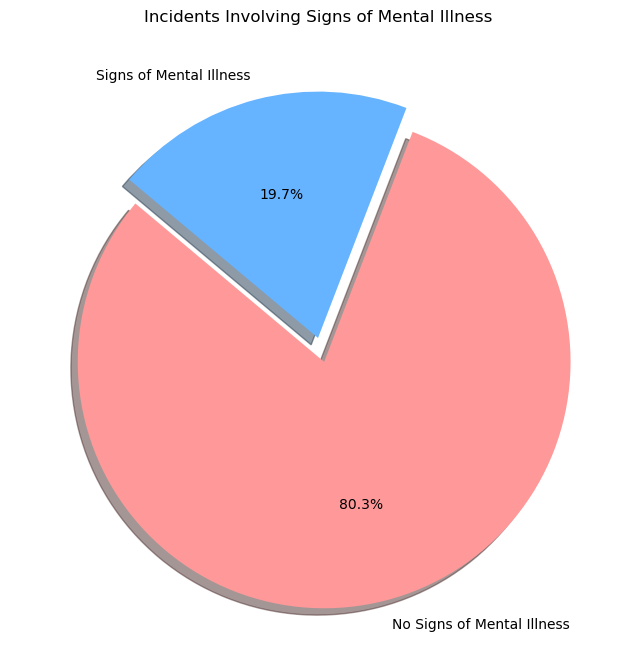

In [99]:
labels = ['No Signs of Mental Illness', 'Signs of Mental Illness']
sizes = mental_illness_shootings['total_shootings']
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Incidents Involving Signs of Mental Illness')
plt.show()

### Explanation:

The pie chart illustrates the proportion of police shootings involving individuals with signs of mental illness. Understanding the prevalence of mental health issues in these incidents can guide the development of specialized training for officers to better handle such situations.

## 5. 🏙️ City-wise Analysis of Police Shootings
Lastly, we'll conduct a city-wise analysis to identify cities with the highest number of police shootings.

In [104]:
query = """
SELECT city, COUNT(*) as total_shootings 
FROM shootings 
GROUP BY city 
ORDER BY total_shootings DESC 
LIMIT 10;
"""

##### Execute the query and load the result into a DataFrame

In [106]:
city_shootings = pd.read_sql_query(query, conn)

##### Display the DataFrame

In [308]:
city_shootings

,city,total_shootings
0,Los Angeles,154
1,Phoenix,124
2,Houston,118
3,San Antonio,95
4,Las Vegas,83
5,Albuquerque,73
6,None,72
7,Columbus,62
8,Jacksonville,58
9,Kansas City,56


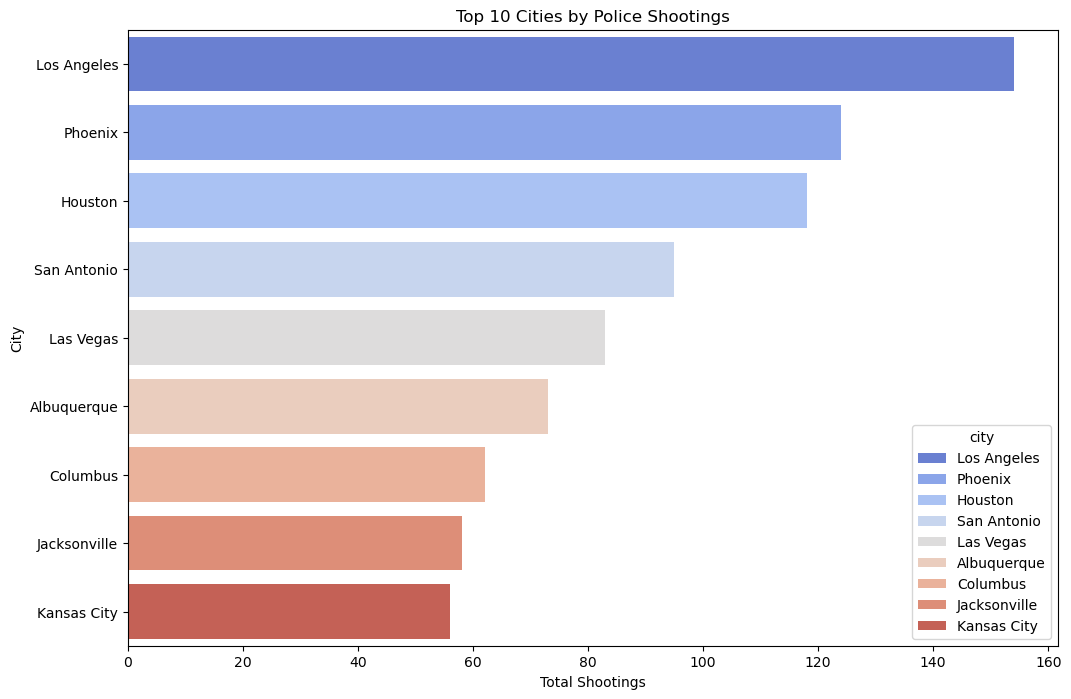

In [116]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_shootings', y='city', hue= 'city',data=city_shootings, palette='coolwarm')
plt.title('Top 10 Cities by Police Shootings')
plt.xlabel('Total Shootings')
plt.ylabel('City')
plt.show()

### Explanation:

This bar chart shows the top 10 cities with the highest number of police shootings. Identifying these hotspots can help target interventions and resources to reduce the incidence of shootings in these areas.

## 6. 🔫 Analysis of Armed Status in Police Shootings
We'll begin by examining the distribution of incidents based on whether the individuals involved were armed or unarmed.

In [121]:
query = """
SELECT armed, COUNT(*) as total_shootings 
FROM shootings 
GROUP BY armed 
ORDER BY total_shootings DESC;
"""

##### Execute the query and load the result into a DataFrame

In [123]:
armed_distribution = pd.read_sql_query(query, conn)

##### Display the DataFrame

In [125]:
armed_distribution

,armed,total_shootings
0,gun,5748
1,knife,1683
2,unarmed,551
3,undetermined,421
4,vehicle,351
5,replica,314
6,blunt_object,239
7,None,211
8,unknown,148
9,other,98


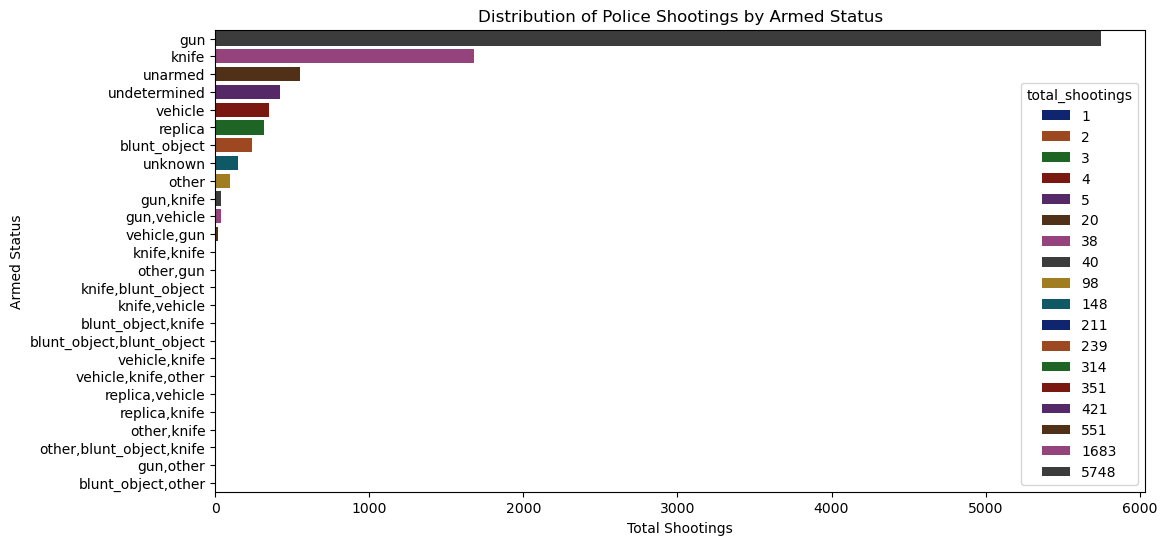

In [139]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_shootings', y='armed', hue = 'total_shootings',data=armed_distribution, palette='dark')
plt.title('Distribution of Police Shootings by Armed Status')
plt.xlabel('Total Shootings')
plt.ylabel('Armed Status')
plt.show()

### Explanation:

This bar chart illustrates the distribution of police shootings based on whether the individual was armed. Understanding the prevalence of armed versus unarmed incidents can shed light on the level of perceived threat by law enforcement officers and might inform policies on the use of force.

## 7.🏳️ Analysis of Race in Police Shootings
Next, we'll analyze the racial demographics of individuals involved in police shootings. This analysis is crucial in assessing potential racial disparities.

In [144]:
query = """
SELECT race, COUNT(*) as total_shootings 
FROM shootings 
GROUP BY race 
ORDER BY total_shootings DESC;
"""

##### Execute the query and load the result into a DataFrame

In [146]:
race_distribution = pd.read_sql_query(query, conn)

##### Display the DataFrame

In [148]:
race_distribution

,race,total_shootings
0,White,4432
1,Black,2346
2,Hispanic,1623
3,Unknown,1144
4,Asian,175
5,Native American,135
6,Other,31
7,"White,Black",2
8,"Black,Hispanic",2
9,"White,Hispanic",1


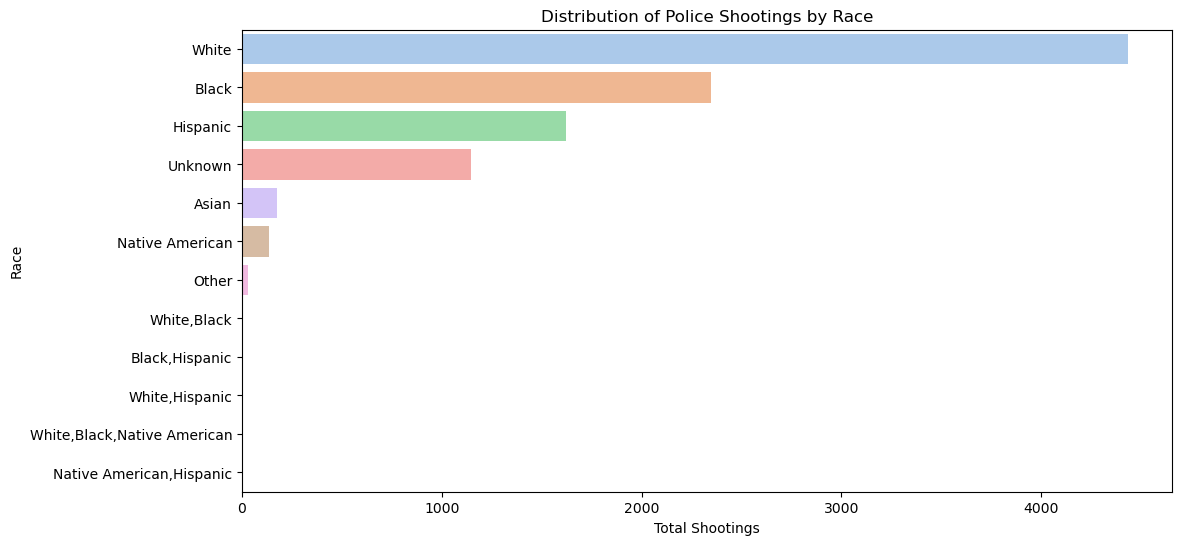

In [154]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_shootings', y='race', hue= 'race', data=race_distribution, palette='pastel')
plt.title('Distribution of Police Shootings by Race')
plt.xlabel('Total Shootings')
plt.ylabel('Race')
plt.show()

### Explanation:

The chart displays the racial breakdown of individuals involved in police shootings. Identifying racial disparities in these incidents is critical for addressing potential biases in law enforcement practices and ensuring equitable treatment across all racial groups.

### 8. 🏃 Analysis of Fleeing Behavior in Police Shootings
Here, we will explore the behavior of individuals during these encounters, specifically focusing on whether they attempted to flee the scene.

In [158]:
query = """
SELECT flee, COUNT(*) as total_shootings 
FROM shootings 
GROUP BY flee 
ORDER BY total_shootings DESC;
"""

##### Execute the query and load the result into a DataFrame

In [160]:
flee_distribution = pd.read_sql_query(query, conn)

##### Display the  DataFrame

In [162]:
flee_distribution

,flee,total_shootings
0,not,5328
1,car,1557
2,None,1345
3,foot,1296
4,other,367


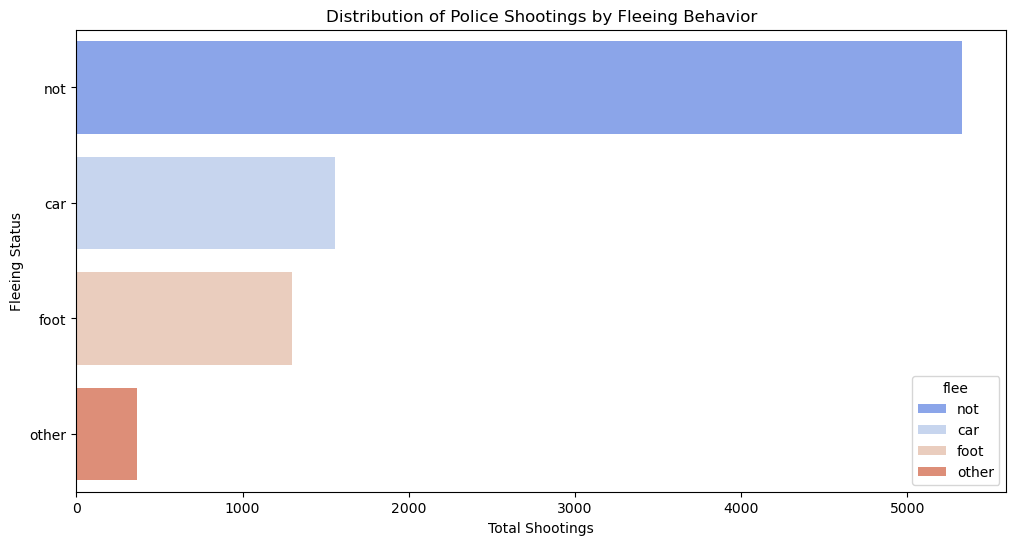

In [166]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_shootings', y='flee', hue='flee', data=flee_distribution, palette='coolwarm')
plt.title('Distribution of Police Shootings by Fleeing Behavior')
plt.xlabel('Total Shootings')
plt.ylabel('Fleeing Status')
plt.show()

### Explanation:

This chart illustrates the distribution of police shootings based on whether the individual attempted to flee. The fleeing behavior of individuals can significantly influence the outcome of encounters, and understanding these patterns can help law enforcement develop better strategies for de-escalation.

### 9.🚹 Analysis of Gender in Police Shootings
Finally, we’ll analyze the gender distribution in police shootings to identify any notable differences between male and female individuals involved in these incidents.

In [172]:
query = """
SELECT gender, COUNT(*) as total_shootings 
FROM shootings 
GROUP BY gender 
ORDER BY total_shootings DESC;
"""

##### Execute the query and load the result into a DataFrame

In [174]:
gender_distribution = pd.read_sql_query(query, conn)

##### Display the  DataFrame

In [176]:
gender_distribution

,gender,total_shootings
0,male,9421
1,female,442
2,None,28
3,non-binary,2


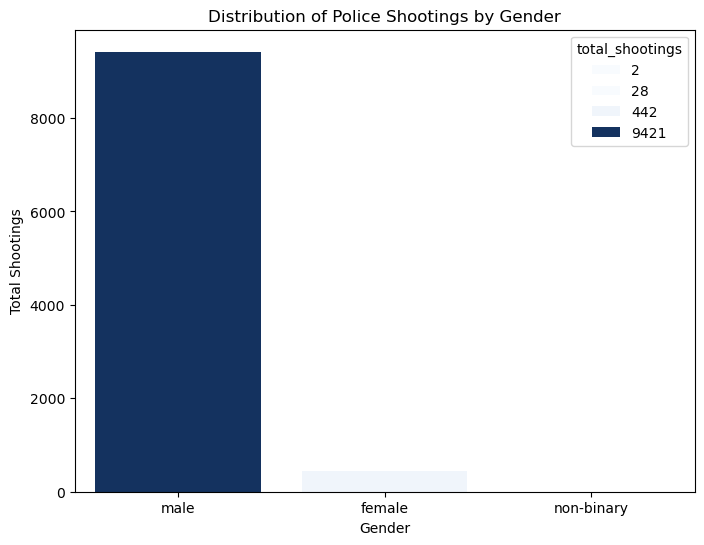

In [182]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='total_shootings', hue='total_shootings', data=gender_distribution, palette='Blues')
plt.title('Distribution of Police Shootings by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Shootings')
plt.show()

### Explanation:

The bar chart provides insight into the gender distribution of individuals involved in police shootings. Understanding gender dynamics in these incidents can inform policies and training aimed at reducing unnecessary use of force.

### 📝 Conclusion
This extended analysis provides deeper insights into the circumstances surrounding police shootings, focusing on critical factors such as the armed status, racial demographics, fleeing behavior, and gender of the individuals involved. As a Security Data Analyst, these findings are essential for informing data-driven decisions that can lead to improved law enforcement practices, enhanced community relations, and ultimately, a reduction in the number of fatal encounters.

George Zacharia